<a href="https://colab.research.google.com/github/SiddhantGodwani/Computer-Vision-/blob/main/Local_Binary_Pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import the colab-specific imshow function

In [3]:
# Function to compute the LBP value for a given set of neighbors
def get_lbp_value(neighbors):
    threshold = neighbors[4]
    binary_values = (neighbors > threshold).astype(np.uint8)
    binary_string = ''.join(map(str, binary_values))
    decimal_value = int(binary_string, 2)
    return decimal_value



In [4]:
# Function to compute the Local Binary Pattern for the entire image
def local_binary_pattern(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray_image.shape
    lbp_image = np.zeros_like(gray_image, dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighbors = [
                gray_image[i - 1, j - 1], gray_image[i - 1, j], gray_image[i - 1, j + 1],
                gray_image[i, j + 1], gray_image[i + 1, j + 1], gray_image[i + 1, j],
                gray_image[i + 1, j - 1], gray_image[i, j - 1]
            ]
            lbp_value = get_lbp_value(neighbors)
            lbp_image[i, j] = lbp_value

    return lbp_image

In [5]:
image_path = 'floor.png'
input_image = cv2.imread(image_path)

In [6]:
# Check if the image is loaded successfully
if input_image is None:
    print(f"Error: Unable to load image from {image_path}")
    exit()

In [7]:
# Compute the LBP representation of the image
lbp_result = local_binary_pattern(input_image)

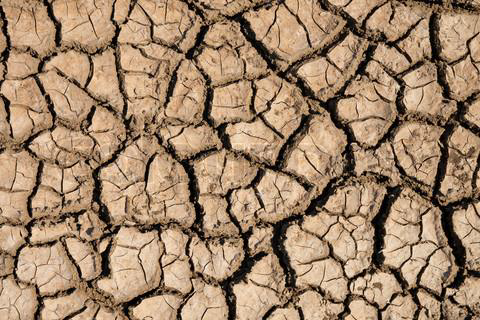

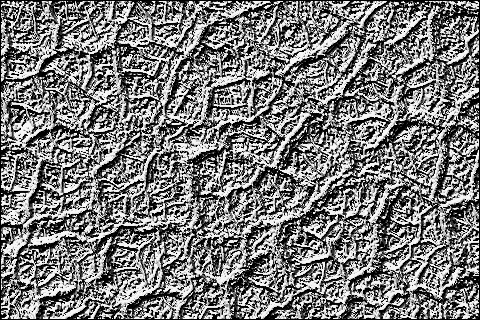

In [8]:
# Display the original and LBP images using cv2_imshow
cv2_imshow(input_image)
cv2_imshow(lbp_result)
cv2.waitKey(0)
cv2.destroyAllWindows()